# WorkShop 4

It is the time to be a Machine Learning Engineer. Pay a lot of attention for instructions.

# Section 1

For this assignment, you will be using the _Breast Cancer Wisconsin_ (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below).


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

### Problem 1.1

_Scikit-learn_ works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a _DataFrame_ does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame. 


Convert the sklearn.dataset `cancer` to a DataFrame. 

_This function should return a_ `(569, 31)` _DataFrame with:_

```
columns = 
    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

index = RangeIndex(start=0, stop=569, step=1)
```

In [2]:
import pandas as pd 
from pandas import RangeIndex

def answer_one():
    index = RangeIndex(start=0, stop=569, step=1)
    df = pd.DataFrame(cancer.data, index=index, columns=cancer.feature_names)
    df['target'] = cancer.target
    df.name = 'Cancer'
    return df

In [3]:
(answer_one()).to_excel('./cancer.xlsx')
answer_one().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# space for professor tests

### Problem 1.2

What is the class distribution? (i.e. how many instances of `malignant` and how many `benign`?)

_This function should return a Series named `target` of length 2 with integer values and index =_ `['malignant', 'benign']`

In [5]:
answer_one()['target'].unique()

array([0, 1])

In [6]:
def answer_two():
    target = pd.Series(index=['malignant', 'benign'], data=(answer_one()['target'].unique()))
    target.name = 'target'
    return target

In [7]:
print(f'{type(answer_two())}\n{answer_two()}')

<class 'pandas.core.series.Series'>
malignant    0
benign       1
Name: target, dtype: int32


In [8]:
# space for professor tests

### Problem 1.3

Split the DataFrame into `X` (the data) and `y` (the labels).

_This function should return a tuple of length 2: `(X, y)`, where:_

- _`X` has shape `(569, 30)`_
- _`y` has shape `(569,)`._

In [9]:
def answer_three():
    X = (answer_one()).drop(columns='target')
    y = (answer_one())['target']
    return (X,y)

In [10]:
print(f'{type(answer_three())}\nX Shape: {answer_three()[0].shape}\ny Shape: {answer_three()[1].shape}')

<class 'tuple'>
X Shape: (569, 30)
y Shape: (569,)


In [11]:
# space for professor tests

### Problem 1.4

Using `train_test_split`, split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)`.

__Set the random number generator state to 0 using `random_state=0` to make sure your results match the autograder!__

_This function should return a tuple of length 4: `(X_train, X_test, y_train, y_test)`, where:_

- _`X_train` has shape `(426, 30)`_
- _`X_test` has shape `(143, 30)`_
- _`y_train` has shape `(426,)`_
- _`y_test` has shape `(143,)`_

In [12]:
from sklearn.model_selection import train_test_split

def answer_four():
    X = answer_three()[0]
    y = answer_three()[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # 0.25 = 143/569
    return (X_train, X_test, y_train, y_test)

In [13]:
af = answer_four()
print(f'{type(af)} {len(af)}\nX train Shape: {af[0].shape}\nX test Shape: {af[1].shape}\ny train Shape: {af[2].shape}\ny test Shape: {af[3].shape}')

<class 'tuple'> 4
X train Shape: (426, 30)
X test Shape: (143, 30)
y train Shape: (426,)
y test Shape: (143,)


In [14]:
# space for professor tests

### Problem 1.5

Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `X_train`, `y_train` and using one nearest neighbor (`n_neighbors = 1`).

_This function should return a `sklearn.neighbors.classification.KNeighborsClassifier`._

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()

    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    return knn

In [16]:
print(answer_five())

KNeighborsClassifier(n_neighbors=1)


In [17]:
# space for professor tests

### Problem 1.6

Using your __knn classifier__, predict the class label using the mean value for each feature.

___Hint:___ _You can use `cancer_df.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the precict method of KNeighborsClassifier)._

In [18]:
def answer_six():
    df = answer_one().drop(columns='target')
    mean_values = df.mean().values.reshape(1,-1)
    knn = answer_five()
    prediction = knn.predict(mean_values)
    return prediction[0]

In [19]:
answer_six()

c:\Programación\Python\Ciencias\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1

In [20]:
# space for professor tests

### Problem 1.7

Using your __knn classifier__, predict the class labels for the test set `X_test`.

_This function should return a numpy array with shape `(143,)` and values either `0.0` or `1.0`._

In [21]:
def answer_seven():
    knn = answer_five()
    return knn.predict(answer_four()[1])

In [22]:
print(f'{answer_seven()}\n{type(answer_seven())}\n{answer_seven().shape}')

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
<class 'numpy.ndarray'>
(143,)


In [23]:
# space for professor tests

### Problem 1.8

Find the score (_mean accuracy_) of your __knn classifier__ using `X_test` and `y_test`.

_This function should return a float between $0$ and $1$._

In [24]:
def answer_eight():
    knn = answer_five()
    return knn.score(answer_four()[1],answer_four()[3])

In [25]:
print(f'Accuracy: {answer_eight()}')

Accuracy: 0.916083916083916


In [26]:
# space for professor tests

### Problem 1.9

Using the plotting function below to visualize the different predicition scores between _train_ and _test sets_, as well as malignant and benign cells.

ACCURACY
Train: 1.0
Test: 0.916083916083916
Benign: 0.9444444444444444
Malignant: 0.8679245283018868


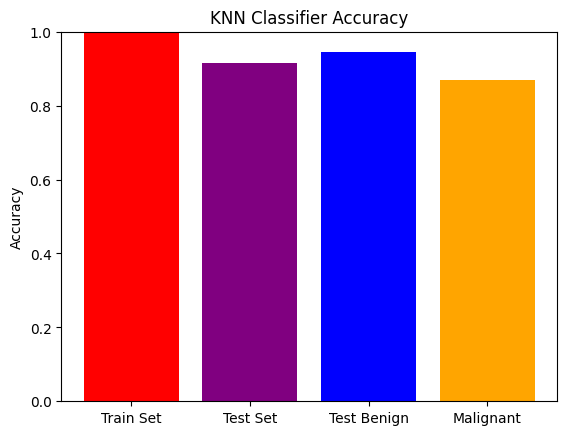

In [27]:
import matplotlib.pyplot as plt
import numpy as np


def plotting_function(labels:list, accuracies:list):
    plt.bar(labels, accuracies, color=['red', 'purple', 'blue', 'orange'])
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy')    
    plt.show()

def answer_nine():
    knn = answer_five()
    X_train, X_test, y_train, y_test = answer_four()
    
    # Predictions train/test -> X 
    train_predictions = knn.predict(X_train) 
    test_predictions = answer_seven()

    train_accuracy = np.mean(train_predictions == y_train)
    test_accuracy = np.mean(test_predictions == y_test)
    
    benign_test_mask = y_test == 1
    malignant_test_mask = y_test == 0
    
    benign_predictions = test_predictions[benign_test_mask]
    malignant_predictions = test_predictions[malignant_test_mask]
    
    benign_accuracy = np.mean(benign_predictions == y_test[benign_test_mask])
    malignant_accuracy = np.mean(malignant_predictions == y_test[malignant_test_mask])
    
    print(f"ACCURACY\nTrain: {train_accuracy}\nTest: {test_accuracy}\nBenign: {benign_accuracy}\nMalignant: {malignant_accuracy}")
    
    accuracies = [train_accuracy, test_accuracy, benign_accuracy, malignant_accuracy]
    labels = ['Train Set', 'Test Set', 'Test Benign', 'Malignant']
    plotting_function(labels,accuracies)    
answer_nine()

## Section 2

In this case, you are going to use a _.csv_ dataset to evaluate some performance.

In [28]:
# depencencies
import numpy as np
import pandas as pd

### Problem 2.1

Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

_This function should return a float between $0$ and $1$._

In [41]:
def answer_eleven():
    df = pd.read_csv('./assets/fraud_data.csv') #Loading fraud_data to a DF
    return len(df[df['Class']==1])/len(df) # (# of Fraud instances) / (# of Observarions) 

In [42]:
print(f'Fraud percentage: {answer_eleven()}')

Fraud percentage: 0.016410823768035772


In [ ]:
# space for professor tests

In [40]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Problem 2.2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

_This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`._

In [43]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

def answer_twelve():
    dummy_classifier = DummyClassifier(strategy='most_frequent')
    dummy_classifier.fit(X_train, y_train)
    y_hat = dummy_classifier.predict(X_test)
    
    #Calculate and returns the accuracy and recall
    return (accuracy_score(y_test, y_hat), recall_score(y_test, y_hat)) 

In [52]:
print(f'Accuracy Score: {answer_twelve()[0]}\nRecall Score: {answer_twelve()[1]}')

Accuracy Score: 0.9852507374631269
Recall Score: 0.0


In [ ]:
# space for professor tests

### Problem 2.3

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a _XGBoost_ classifer using the default parameters. What is the accuracy, recall, precision, and F1 Score of this classifier?

_This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score, f1 score)`._

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier

def answer_thirteen():
    xgb_classifier = XGBClassifier(eval_metric='logloss')
    xgb_classifier.fit(X_train, y_train)

    y_pred = xgb_classifier.predict(X_test) # Prediction

    # Calculate and return the metrics
    return (accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred))

In [54]:
print(f'Accuracy Score: {answer_thirteen()[0]}\nRecall Score: {answer_thirteen()[1]}\nPrecision Score: {answer_thirteen()[2]}\nF1 Score Score: {answer_thirteen()[3]}')

Accuracy Score: 0.9968657817109144
Recall Score: 0.8125
Precision Score: 0.9701492537313433
F1 Score Score: 0.8843537414965986


In [ ]:
# space for professor tests